In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_excel('/заболевшие по дням.xlsx')
df = df.drop(columns = 'Unnamed: 0')
for column in df.columns[1:]:
    for i in range(len(df[column])):
        if df[column].loc[i] < 0:
            df[column][i] = 0

df.head()

,region,2021-02-04 00:00:00,2021-02-03 00:00:00,2021-02-02 00:00:00,2021-02-01 00:00:00,2021-01-31 00:00:00,2021-01-30 00:00:00,2021-01-29 00:00:00,2021-01-28 00:00:00,2021-01-27 00:00:00,...,2020-04-04 00:00:00,2020-04-03 00:00:00,2020-04-02 00:00:00,2020-04-01 00:00:00,2020-03-31 00:00:00,2020-03-30 00:00:00,2020-03-29 00:00:00,2020-03-28 00:00:00,2020-03-27 00:00:00,2020-03-26 00:00:00
0,Алтайский край,180,182,178,180,181,183,185,184,187,...,3,0,1,1,1,1,0,0,0,0
1,Амурская область,88,83,87,83,85,90,89,91,95,...,3,0,0,0,0,0,1,0,0,0
2,Архангельская область,241,241,240,242,243,238,242,244,243,...,0,1,0,0,0,4,0,0,0,3
3,Астраханская область,156,162,164,169,168,170,172,171,174,...,0,3,0,0,2,0,0,0,0,0
4,Белгородская область,166,168,171,169,172,171,174,172,176,...,1,0,1,0,0,3,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 317 entries, region to 2020-03-26 00:00:00
dtypes: int64(316), object(1)
memory usage: 210.6+ KB


In [ ]:
regions = list(df['region'].unique())

In [ ]:
dates = list(map(str,df.columns))
for i in range(len(dates)):
  dates[i] = dates[i][:10]

In [ ]:
data = df.copy(deep=True)
data.columns = dates
data.head()

,region,2021-02-04,2021-02-03,2021-02-02,2021-02-01,2021-01-31,2021-01-30,2021-01-29,2021-01-28,2021-01-27,...,2020-04-04,2020-04-03,2020-04-02,2020-04-01,2020-03-31,2020-03-30,2020-03-29,2020-03-28,2020-03-27,2020-03-26
0,Алтайский край,180,182,178,180,181,183,185,184,187,...,3,0,1,1,1,1,0,0,0,0
1,Амурская область,88,83,87,83,85,90,89,91,95,...,3,0,0,0,0,0,1,0,0,0
2,Архангельская область,241,241,240,242,243,238,242,244,243,...,0,1,0,0,0,4,0,0,0,3
3,Астраханская область,156,162,164,169,168,170,172,171,174,...,0,3,0,0,2,0,0,0,0,0
4,Белгородская область,166,168,171,169,172,171,174,172,176,...,1,0,1,0,0,3,1,0,0,1


['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020

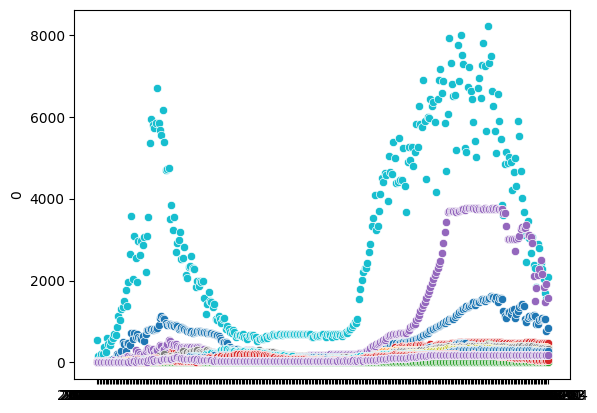

In [ ]:
new_cols = list(data.columns)
new_cols.reverse()
print(new_cols)
save = new_cols[-1]
new_cols.insert(0, save)
new_cols.pop()
data = data[new_cols]
print(data.columns)
for region in data['region'].unique():

    #if region == 'Москва': continue
    #if region == 'Московская область': continue
    #if region == 'Ленинградская область': continue
    data_choose = data[data['region'] == region]
    sns.scatterplot(y = data_choose.iloc[0, 1:], x = data_choose.columns[1:])
    #idx += 1

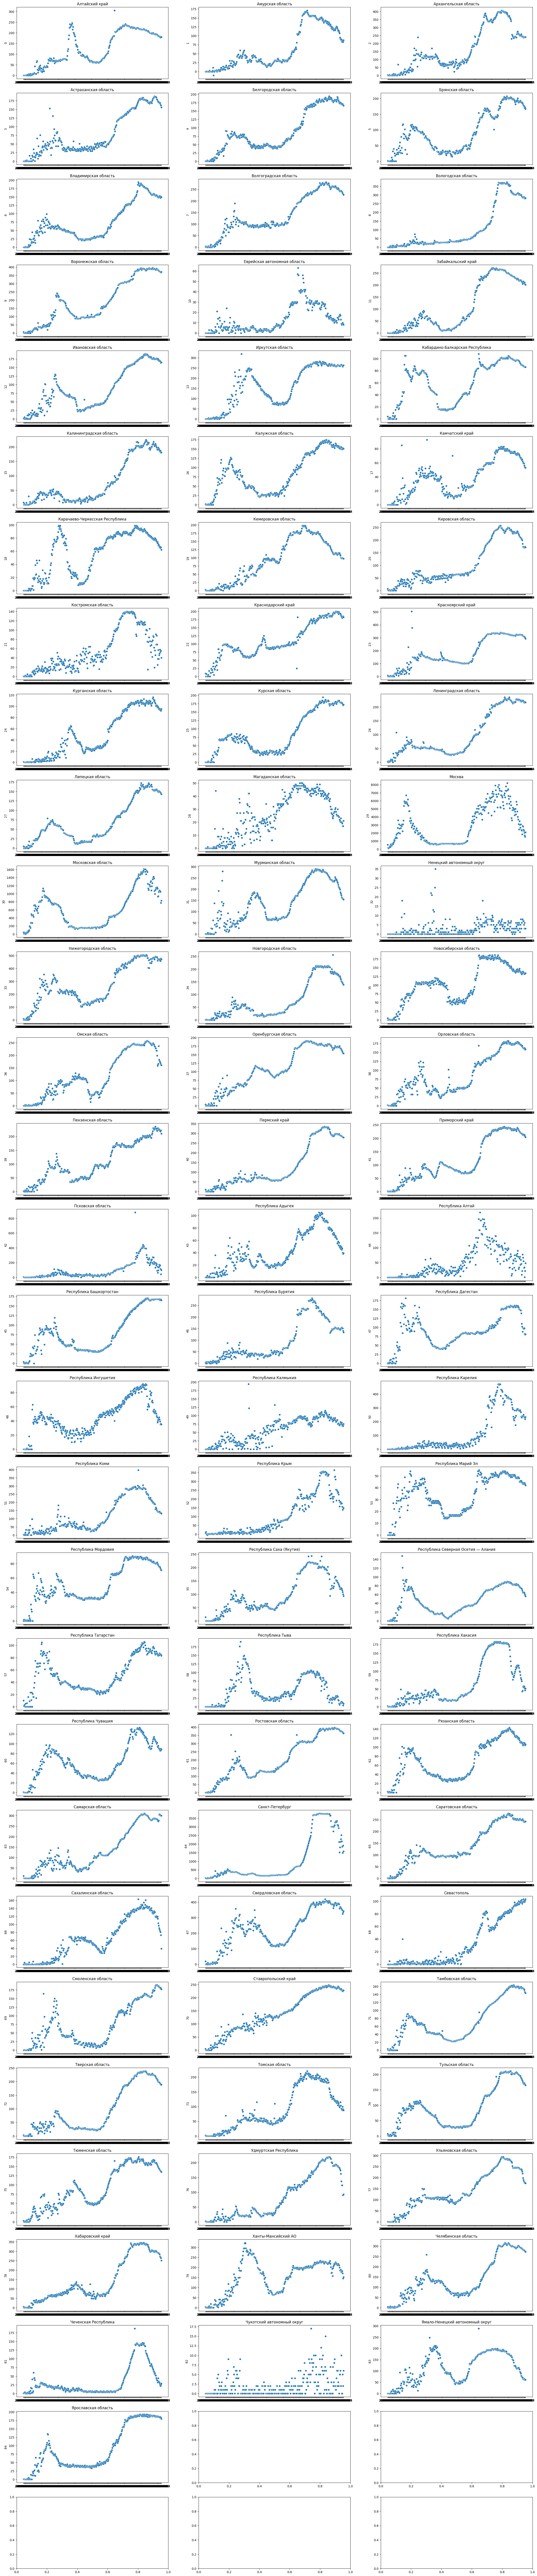

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(30, 3, figsize=(30, 150))
i = 0
j = 0
for region in data['region'].unique():

    #if region == 'Москва': continue
    #if region == 'Московская область': continue
    #if region == 'Ленинградская область': continue
    data_choose = data[data['region'] == region]
    axes[i][j].set_title(region)
    sns.scatterplot(ax = axes[i, j], y = data_choose.iloc[0, 1:], x = data_choose.columns[1:])
    #idx += 1
    j += 1
    if j == 3:
        i += 1
        j = 0

In [ ]:
dates = list(data.columns[1:])

In [ ]:
print(dates[0], dates[-1])

2020-03-26 2021-02-04


In [ ]:
dates[:10]

['2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04']

In [ ]:
regions[:10]

regions_indexes = dict()
for i in range(len(regions)):
    regions_indexes[regions[i]] = i

In [ ]:
regions_indexes['Ненецкий автономный округ'], regions_indexes['Чукотский автономный округ']

In [ ]:
data = data.drop(32, axis = 0)
data = data.drop(82, axis = 0)

In [ ]:
regions_used = regions.copy()
regions_used.remove('Ненецкий автономный округ')
regions_used.remove('Чукотский автономный округ')
data.index = [i for i in range(len(regions_used))]

data= data.drop('region', axis = 1)
data

,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04
0,0,0,0,0,1,1,1,1,0,3,...,189,187,184,185,183,181,180,178,182,180
1,0,0,0,1,0,0,0,0,0,3,...,107,95,91,89,90,85,83,87,83,88
2,3,0,0,0,4,0,0,0,1,0,...,248,243,244,242,238,243,242,240,241,241
3,0,0,0,0,0,2,0,0,3,0,...,175,174,171,172,170,168,169,164,162,156
4,1,0,0,1,3,0,0,1,0,1,...,173,176,172,174,171,172,169,171,168,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,4,0,0,1,0,0,3,0,8,0,...,199,185,188,189,178,182,182,171,146,152
79,5,0,4,3,2,0,7,0,2,3,...,289,287,285,282,281,279,280,278,275,273
80,1,2,2,4,0,0,1,0,2,3,...,32,32,44,35,33,31,26,22,25,29
81,0,0,0,0,0,0,0,2,10,0,...,75,72,71,64,63,63,65,61,62,61


In [ ]:
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA as ar
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

<ipython-input-76-038b2f1b1d9b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
x = data.values
x


array([[  0,   0,   0, ..., 178, 182, 180],
       [  0,   0,   0, ...,  87,  83,  88],
       [  3,   0,   0, ..., 240, 241, 241],
       ...,
       [  1,   2,   2, ...,  22,  25,  29],
       [  0,   0,   0, ...,  61,  62,  61],
       [  1,   1,   0, ..., 183, 184, 180]])

In [ ]:
size = int(len(x[0]) * 0.66)
size

208

In [ ]:
train, test = x[:, 0:size], x[:, size:len(x[0])]
len(test[0])
#train = list(train)
#test = list(test)

108

In [ ]:
predictions = [[] for i in range(83)]
#predictions

In [ ]:
def parser(X):
    return datetime.strptime('201'+X, '%Y-%m')
len(test[0], train[0])

108

In [ ]:
for i in range (83):
  history = [X for X in train[i]]
  predictions[i] =[]
  print(i)
  for t in range(len(test[i])):

    model = ar(history, order=(5,1,0))

    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    #print(yhat)
    predictions[i].append(yhat)
    obs = test[i][t]

    history.append(obs)
    #print('region:', regions_used[i], 'predicted=%f, expected=%f' % (yhat, obs))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82


In [ ]:
train[0].shape, test[0].shape

((208,), (108,))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
print(len(predictions[0]))
len(test[0])

108


108

14.196046867985752


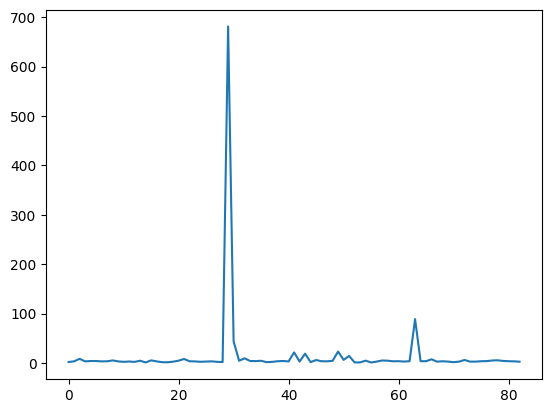

In [ ]:
maes = [0 for i in range(83)]
for i in range (83):
    #if regions[i] == 'Московская область': continue
    maes[i] = mean_absolute_error(test[i], predictions[i])

    #print('Test MAE: %.3f' % maes[i], i)

print(sum(maes) / (len(maes)))
plt.plot([mean_absolute_error(test[i], predictions[i]) for i in range(83)])

Test MAPE: 0.010 0
Test MAPE: 0.028 1
Test MAPE: 0.029 2
Test MAPE: 0.024 3
Test MAPE: 0.026 4
Test MAPE: 0.025 5
Test MAPE: 0.024 6
Test MAPE: 0.015 7
Test MAPE: 0.024 8
Test MAPE: 0.010 9
Test MAPE: 0.103 10
Test MAPE: 0.013 11
Test MAPE: 0.016 12
Test MAPE: 0.019 13
Test MAPE: 0.013 14
Test MAPE: 0.034 15
Test MAPE: 0.025 16
Test MAPE: 0.027 17
Test MAPE: 0.019 18
Test MAPE: 0.019 19
Test MAPE: 0.026 20
Test MAPE: 0.136 21
Test MAPE: 0.023 22
Test MAPE: 0.011 23
Test MAPE: 0.026 24
Test MAPE: 0.020 25
Test MAPE: 0.019 26
Test MAPE: 0.019 27
Test MAPE: 0.061 28
Test MAPE: 0.140 29
Test MAPE: 0.042 30
Test MAPE: 0.020 31
Test MAPE: 0.022 32
Test MAPE: 0.028 33
Test MAPE: 0.024 34
Test MAPE: 0.022 35
Test MAPE: 0.010 36
Test MAPE: 0.016 37
Test MAPE: 0.019 38
Test MAPE: 0.018 39
Test MAPE: 0.016 40
Test MAPE: 0.134 41
Test MAPE: 0.042 42
Test MAPE: 0.730 43
Test MAPE: 0.016 44
Test MAPE: 0.032 45
Test MAPE: 0.033 46
Test MAPE: 0.054 47
Test MAPE: 0.051 48
Test MAPE: 0.094 49
Test MAPE:

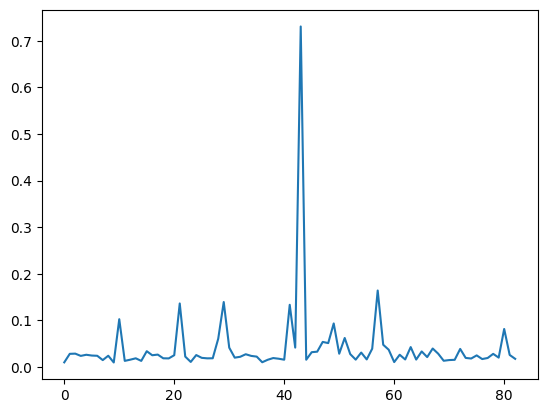

In [ ]:
for i in range (83):
    mape = mean_absolute_percentage_error(test[i], predictions[i])
    print('Test MAPE: %.3f' % mape, i)

plt.plot([mean_absolute_percentage_error(test[i], predictions[i]) for i in range(83)])

<function matplotlib.pyplot.show(close=None, block=None)>

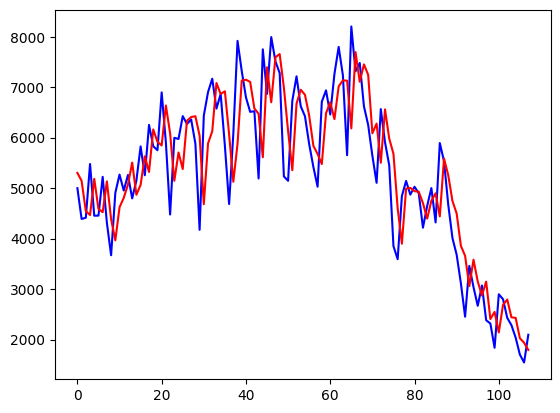

In [ ]:
pyplot.plot(test[29], color = 'blue')
pyplot.plot(predictions[29], color='red')
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

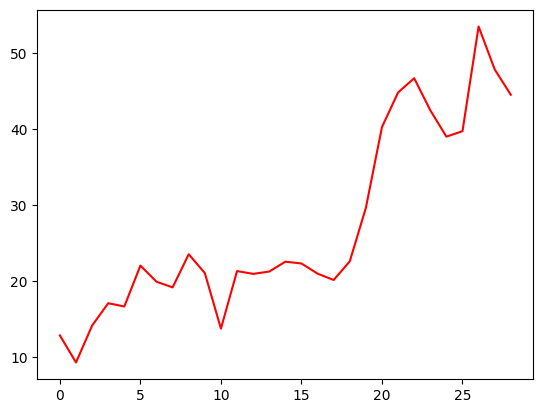

In [ ]:
pyplot.plot(predictions[1], color='red')
pyplot.show